In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/CAChemE/curso-python-datos/master/data/weather_data.csv"
df = pd.read_csv(url)


In [ ]:

df['fecha'] = pd.to_datetime(df['fecha'])
print("\nTipo de dato de la columna 'fecha':", df['fecha'].dtype)



Tipo de dato de la columna 'fecha': datetime64[ns]


In [7]:
print(df.isnull().sum())

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        moda = df[col].mode()[0]
        df[col] = df[col].replace(['Varias', ''], moda)
        df[col] = df[col].fillna(moda)

print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())


altitud         0
dir            48
fecha           0
horaPresMax     1
horaPresMin     1
horaracha      48
horatmax        0
horatmin        0
indicativo      0
nombre          0
prec           15
presMax         1
presMin         1
provincia       0
racha          48
sol             7
tmax            0
tmed            0
tmin            0
velmedia       48
dtype: int64

Valores nulos después de la limpieza:
altitud        0
dir            0
fecha          0
horaPresMax    0
horaPresMin    0
horaracha      0
horatmax       0
horatmin       0
indicativo     0
nombre         0
prec           0
presMax        0
presMin        0
provincia      0
racha          0
sol            0
tmax           0
tmed           0
tmin           0
velmedia       0
dtype: int64


In [9]:

print(df.shape)
# La temperatura media del período registrado.
temperatura_media = df['tmed'].mean()
print(f"\nTemperatura media del período: {temperatura_media:.2f} °C")

# La temperatura máxima y la fecha en la que ocurrió.
max_temp = df['tmax'].max()
fecha_max_temp = df['fecha'][df['tmax'] == max_temp].iloc[0]
print(f"Temperatura máxima: {max_temp:.2f} °C, ocurrida el: {fecha_max_temp.strftime('%Y-%m-%d')}")

# La temperatura mínima y la fecha en la que ocurrió.
min_temp = df['tmin'].min()
fecha_min_temp = df['fecha'][df['tmin'] == min_temp].iloc[0]
print(f"Temperatura mínima: {min_temp:.2f} °C, ocurrida el: {fecha_min_temp.strftime('%Y-%m-%d')}")

# El rango de temperatura (máxima - mínima).
rango_temp = max_temp - min_temp
print(f"Rango de temperatura: {rango_temp:.2f} °C")


(1826, 20)

Temperatura media del período: 15.16 °C
Temperatura máxima: 33.60 °C, ocurrida el: 2012-05-10
Temperatura mínima: 1.00 °C, ocurrida el: 2015-02-04
Rango de temperatura: 32.60 °C


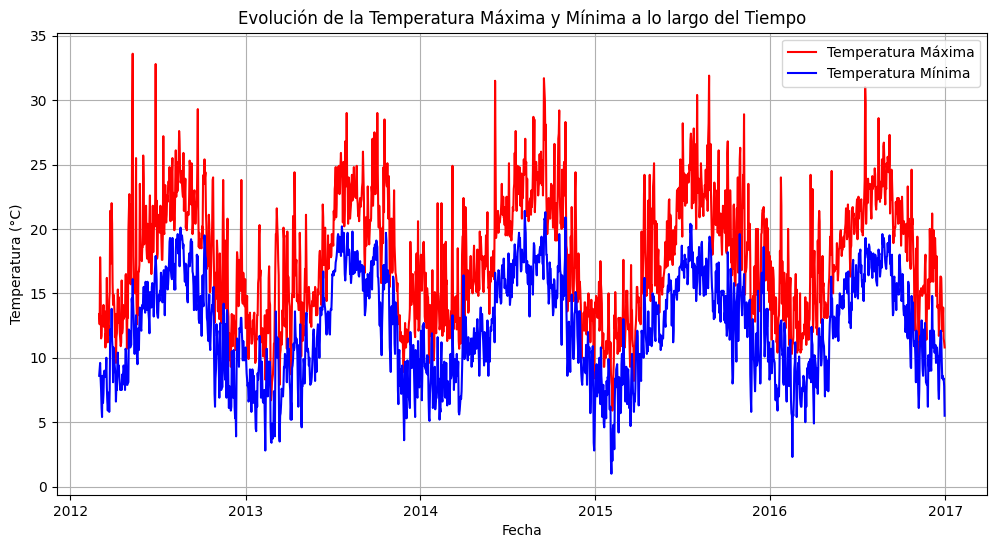

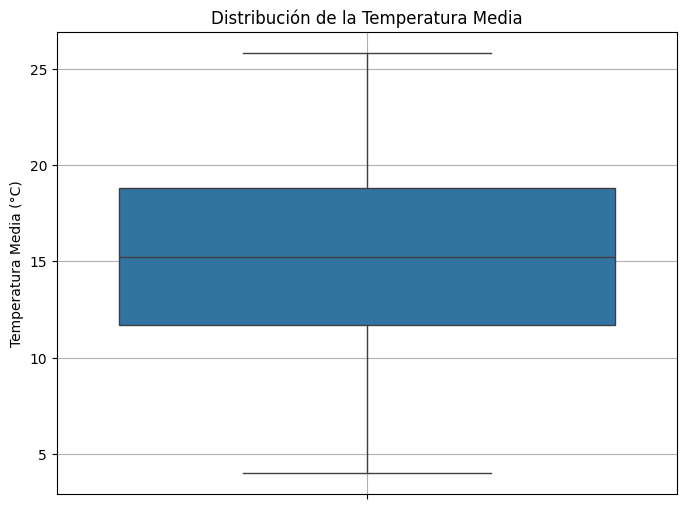

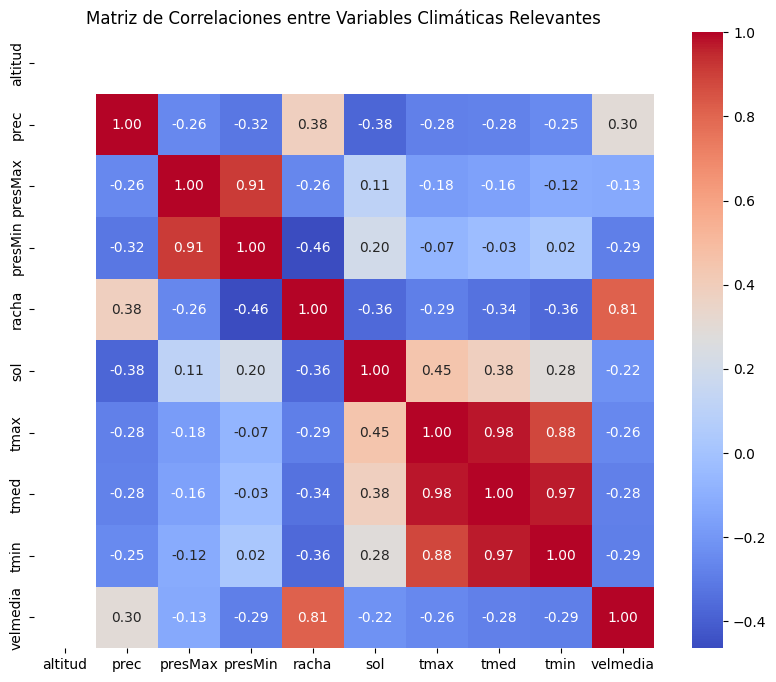

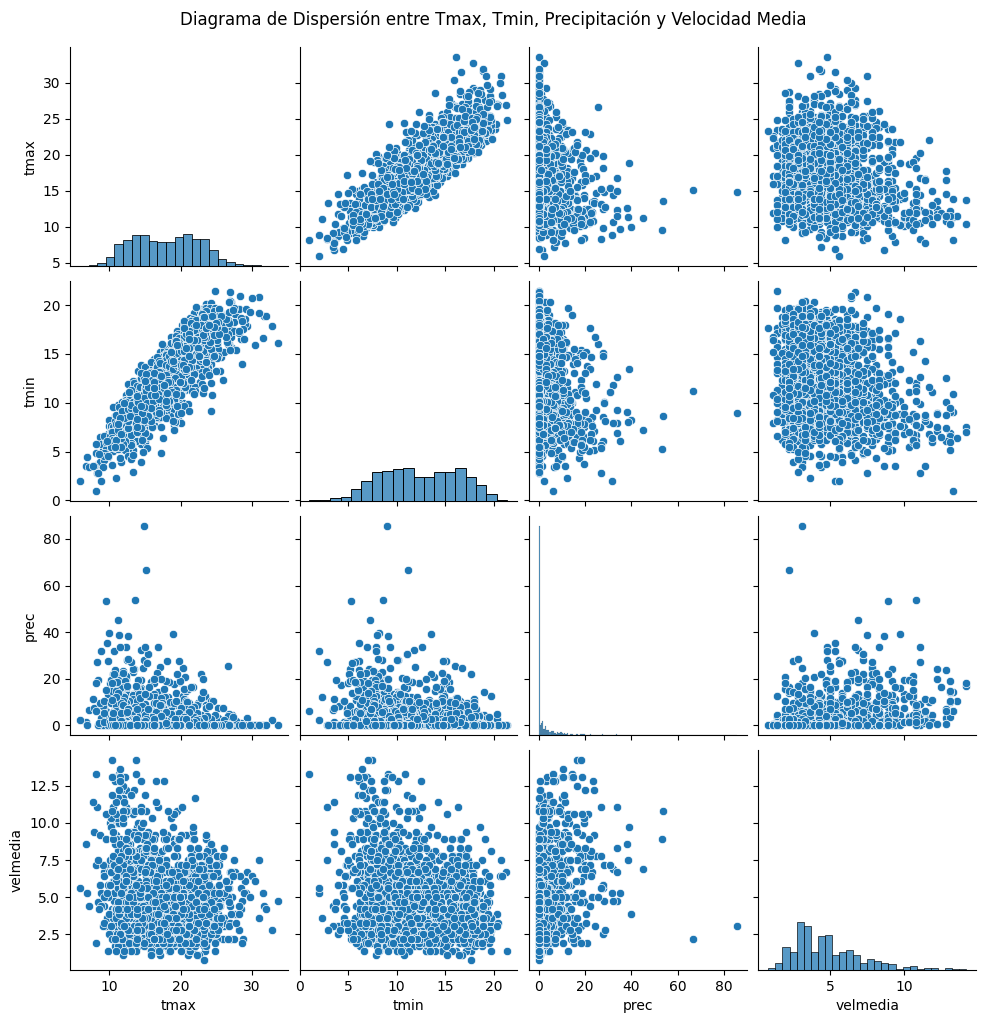

In [ ]:

# grafica de líneas que muestre la evolución de la temperatura máxima y mínima a lo largo del tiempo.
plt.figure(figsize=(12, 6))
plt.plot(df['fecha'], df['tmax'], label='Temperatura Máxima', color='red')
plt.plot(df['fecha'], df['tmin'], label='Temperatura Mínima', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Evolución de la Temperatura Máxima y Mínima a lo largo del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Un boxplot de la temperatura media.
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['tmed'])
plt.ylabel('Temperatura Media (°C)')
plt.title('Distribución de la Temperatura Media')
plt.grid(True)
plt.show()

# diagrma de calor de las variables climáticas
numeric_df = df[['altitud', 'prec', 'presMax', 'presMin', 'racha', 'sol', 'tmax', 'tmed', 'tmin', 'velmedia']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones entre Variables Climáticas Relevantes')
plt.show()

# diagrama de las cuatro varibles 
sns.pairplot(df[['tmax', 'tmin', 'prec', 'velmedia']])
plt.suptitle('Diagrama de Dispersión entre Tmax, Tmin, Precipitación y Velocidad Media', y=1.02)
plt.show()